In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import r2_score   #Importing all the required modules

In [3]:
file_path=r"C:\Users\vamshi\Desktop\datasets\lifeexpectancy\life_expectancy.csv"
data=pd.read_csv(file_path) #Reading the CSV file using pandas
print(data) #printing the csv file(dataframe)

          Country  Year      Status  Life expectancy   Adult Mortality  \
0     Afghanistan  2015  Developing              65.0            263.0   
1     Afghanistan  2014  Developing              59.9            271.0   
2     Afghanistan  2013  Developing              59.9            268.0   
3     Afghanistan  2012  Developing              59.5            272.0   
4     Afghanistan  2011  Developing              59.2            275.0   
5     Afghanistan  2010  Developing              58.8            279.0   
6     Afghanistan  2009  Developing              58.6            281.0   
7     Afghanistan  2008  Developing              58.1            287.0   
8     Afghanistan  2007  Developing              57.5            295.0   
9     Afghanistan  2006  Developing              57.3            295.0   
10    Afghanistan  2005  Developing              57.3            291.0   
11    Afghanistan  2004  Developing              57.0            293.0   
12    Afghanistan  2003  Developing   

In [4]:
print(data.shape) #Printing the dimensions of the dataset

(2938, 22)


In [5]:
print(data.columns)
data.columns = data.columns.str.replace(' ', '') #replacing all the spaces with no space in the attribute names for easy use in future
print(data.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')
Index(['Country', 'Year', 'Status', 'Lifeexpectancy', 'AdultMortality',
       'infantdeaths', 'Alcohol', 'percentageexpenditure', 'HepatitisB',
       'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Totalexpenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness1-19years',
       'thinness5-9years', 'Incomecompositionofresources', 'Schooling'],
      dtype='object')


In [6]:
print(data.head()) #printing the first 5 rows of the dataset for sample view

       Country  Year      Status  Lifeexpectancy  AdultMortality  \
0  Afghanistan  2015  Developing            65.0           263.0   
1  Afghanistan  2014  Developing            59.9           271.0   
2  Afghanistan  2013  Developing            59.9           268.0   
3  Afghanistan  2012  Developing            59.5           272.0   
4  Afghanistan  2011  Developing            59.2           275.0   

   infantdeaths  Alcohol  percentageexpenditure  HepatitisB  Measles  \
0            62     0.01              71.279624        65.0     1154   
1            64     0.01              73.523582        62.0      492   
2            66     0.01              73.219243        64.0      430   
3            69     0.01              78.184215        67.0     2787   
4            71     0.01               7.097109        68.0     3013   

     ...      Polio  Totalexpenditure  Diphtheria  HIV/AIDS         GDP  \
0    ...        6.0              8.16        65.0       0.1  584.259210   
1    ...

In [8]:
print(data.describe()) #describing each attribute of the data based on their properties 

              Year  Lifeexpectancy  AdultMortality  infantdeaths      Alcohol  \
count  2938.000000     2928.000000     2928.000000   2938.000000  2744.000000   
mean   2007.518720       69.224932      164.796448     30.303948     4.602861   
std       4.613841        9.523867      124.292079    117.926501     4.052413   
min    2000.000000       36.300000        1.000000      0.000000     0.010000   
25%    2004.000000       63.100000       74.000000      0.000000     0.877500   
50%    2008.000000       72.100000      144.000000      3.000000     3.755000   
75%    2012.000000       75.700000      228.000000     22.000000     7.702500   
max    2015.000000       89.000000      723.000000   1800.000000    17.870000   

       percentageexpenditure   HepatitisB        Measles          BMI  \
count            2938.000000  2385.000000    2938.000000  2904.000000   
mean              738.251295    80.940461    2419.592240    38.321247   
std              1987.914858    25.070016   11467.2

In [9]:
print(data.isnull().sum()) #identifying the null values in each attribute

Country                           0
Year                              0
Status                            0
Lifeexpectancy                   10
AdultMortality                   10
infantdeaths                      0
Alcohol                         194
percentageexpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
under-fivedeaths                  0
Polio                            19
Totalexpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                      652
thinness1-19years                34
thinness5-9years                 34
Incomecompositionofresources    167
Schooling                       163
dtype: int64


In [10]:
data=data.fillna(method="ffill")  #replacing the null values with previously occuring non-null value
data=data.drop(['Country','Year'],axis=1) #dropping Country and Year as they don't affect the life expectancy 
data['Status'] = data['Status'].replace(['Developing','Developed'],[0, 1])#Changing text based values to numeric for numeric processing

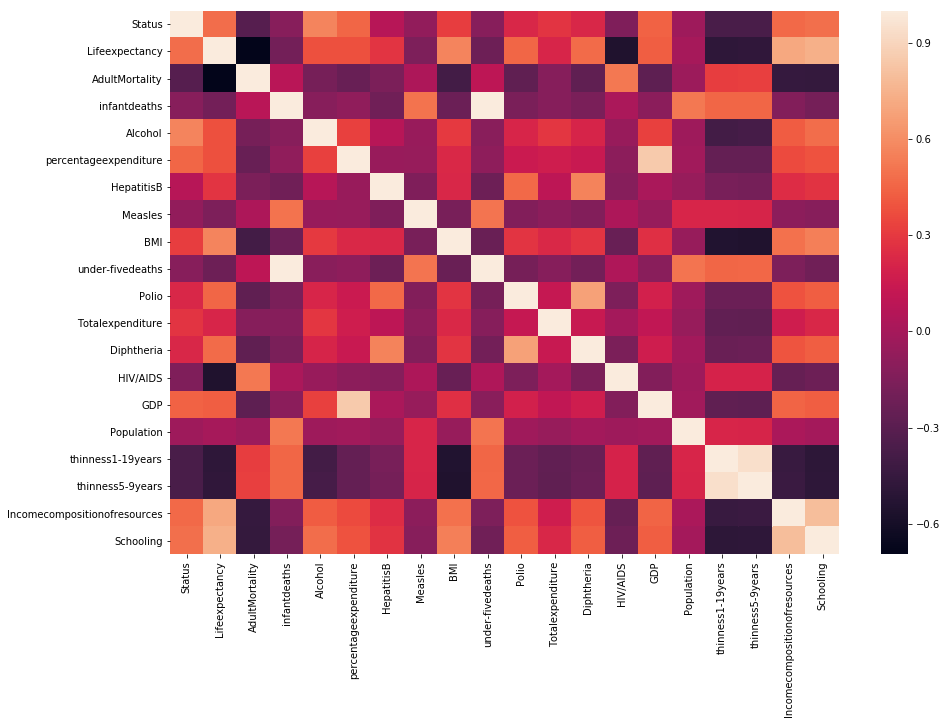

In [12]:
plt.figure(figsize = (15, 10)) #Setting the output figure size
sns.heatmap(data.corr()) #drawing a heatmap using seaborn to study the dependency 

In [13]:
print(data.corr()['Lifeexpectancy'].sort_values()[::-1]) #finding the correlation of Lifeexpectancy with all other attributes in descending order

Lifeexpectancy                  1.000000
Schooling                       0.736323
Incomecompositionofresources    0.705641
BMI                             0.567361
Status                          0.481907
Diphtheria                      0.470947
Polio                           0.456336
GDP                             0.429252
percentageexpenditure           0.381847
Alcohol                         0.380721
HepatitisB                      0.284345
Totalexpenditure                0.212256
Population                      0.003051
Measles                        -0.156446
infantdeaths                   -0.195148
under-fivedeaths               -0.221021
thinness5-9years               -0.480438
thinness1-19years              -0.484921
HIV/AIDS                       -0.553770
AdultMortality                 -0.694702
Name: Lifeexpectancy, dtype: float64


In [14]:
useful_data=data.drop(['Population','Measles','infantdeaths','under-fivedeaths','thinness5-9years','thinness1-19years','HIV/AIDS','AdultMortality'],axis=1) #dropping zero and negative correlation attributes


In [16]:
#replacing all the zeroes with previous non-zero value based on describe output
useful_data[['percentageexpenditure','Incomecompositionofresources','Schooling']]=useful_data[['percentageexpenditure','Incomecompositionofresources','Schooling']].replace(0.,method="ffill")


In [17]:
print(useful_data.describe()) #describing the data again to check how well the previous command worked

            Status  Lifeexpectancy      Alcohol  percentageexpenditure  \
count  2938.000000     2938.000000  2938.000000            2938.000000   
mean      0.174268       69.195643     4.607270             842.937078   
std       0.379405        9.536654     4.044785            2012.731242   
min       0.000000       36.300000     0.010000               0.099872   
25%       0.000000       63.025000     0.880000              29.299697   
50%       0.000000       72.000000     3.765000             140.836502   
75%       0.000000       75.600000     7.665000             645.958382   
max       1.000000       89.000000    17.870000           19479.911610   

        HepatitisB          BMI        Polio  Totalexpenditure   Diphtheria  \
count  2938.000000  2938.000000  2938.000000       2938.000000  2938.000000   
mean     75.683799    38.020150    82.307692          5.905211    82.075221   
std      28.851806    20.175077    23.636677          2.484620    23.917022   
min       1.00000

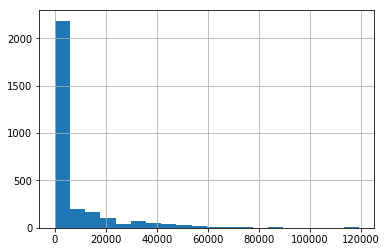

In [19]:
useful_data['GDP'].hist(bins=20) #plotting histogram of GDP because it has a lot of difference between min and max values

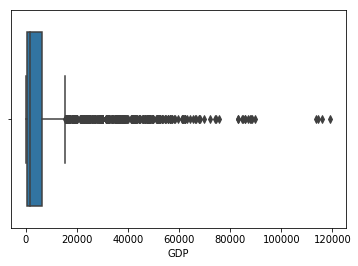

In [20]:
sns.boxplot(x=useful_data['GDP']) #Plotting a seaborn boxplot

In [21]:
print(useful_data.columns) #listing the columns for plotting in next steps

Index(['Status', 'Lifeexpectancy', 'Alcohol', 'percentageexpenditure',
       'HepatitisB', 'BMI', 'Polio', 'Totalexpenditure', 'Diphtheria', 'GDP',
       'Incomecompositionofresources', 'Schooling'],
      dtype='object')


{'whiskers': [<matplotlib.lines.Line2D at 0x2b5a85b1a90>,
 'caps': [<matplotlib.lines.Line2D at 0x2b5a85bb390>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b5a85b1940>],
 'medians': [<matplotlib.lines.Line2D at 0x2b5a85bbbe0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b5a85c4048>],
 'means': []}

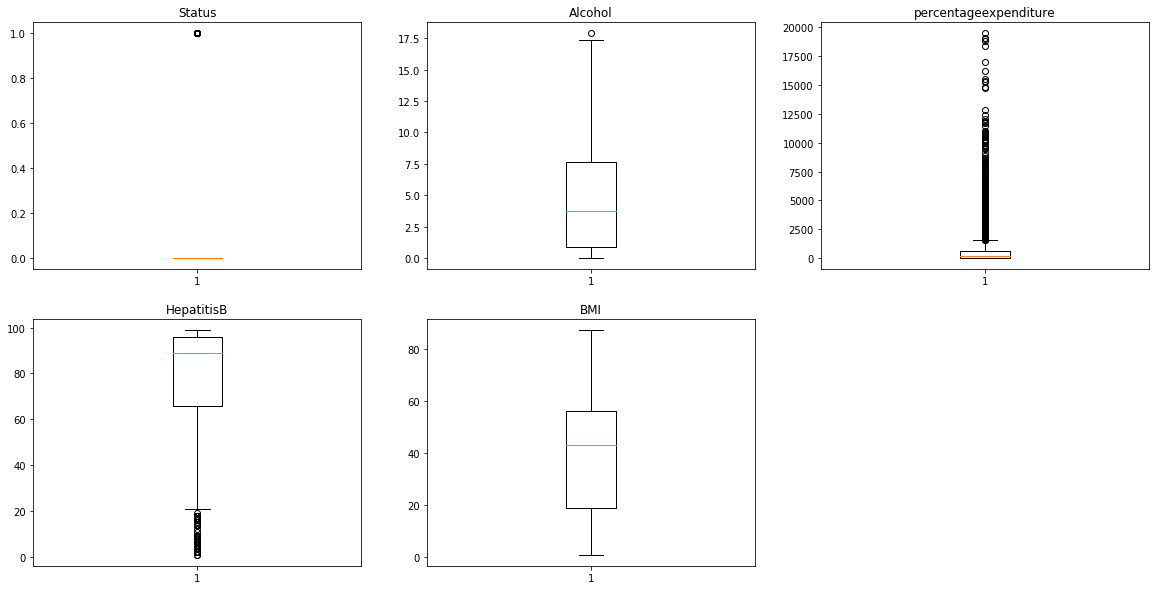

In [28]:
plt.figure(figsize=(20,10))
plt.subplot(231)
plt.title('Status')
plt.boxplot(useful_data['Status'])
plt.subplot(232)
plt.title('Alcohol')
plt.boxplot(useful_data['Alcohol'])
plt.subplot(233)
plt.title('percentageexpenditure')
plt.boxplot(useful_data['percentageexpenditure'])
plt.subplot(234)
plt.title('HepatitisB')
plt.boxplot(useful_data['HepatitisB'])
plt.subplot(235)
plt.title('BMI')
plt.boxplot(useful_data['BMI'])   #plotting the first 5 subplots consisting of boxplots to identify outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x2b5a8d24588>,
 'caps': [<matplotlib.lines.Line2D at 0x2b5a8d24e48>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b5a8d24438>],
 'medians': [<matplotlib.lines.Line2D at 0x2b5a8d2b6d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b5a8d2bb00>],
 'means': []}

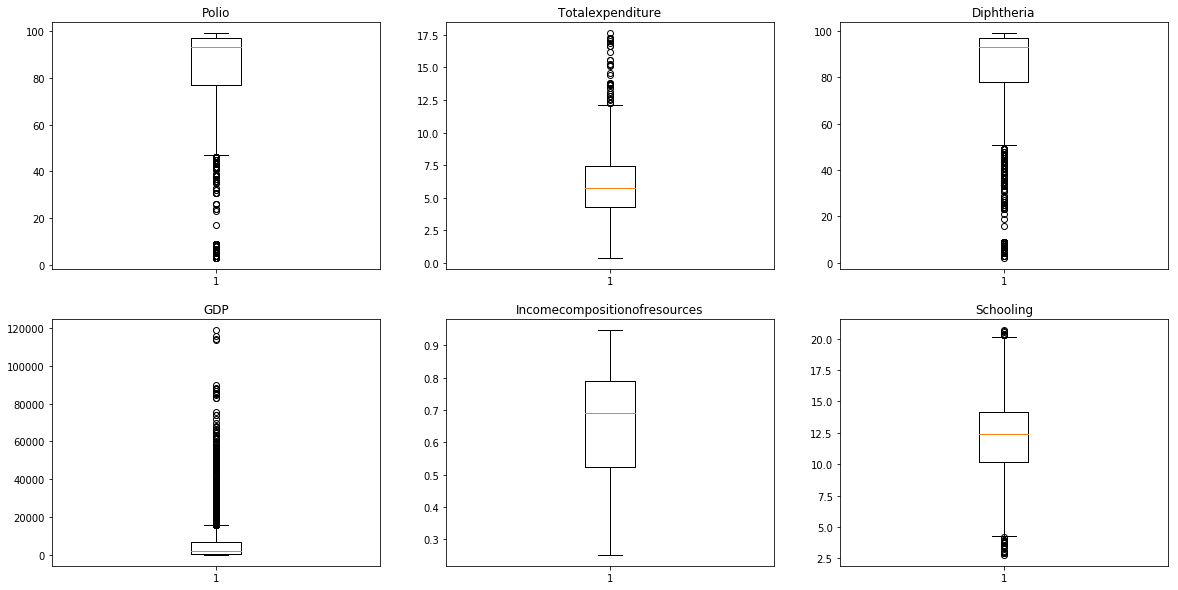

In [29]:
plt.figure(figsize=(20,10))
plt.subplot(231)
plt.title('Polio')
plt.boxplot(useful_data['Polio'])
plt.subplot(232)
plt.title('Totalexpenditure')
plt.boxplot(useful_data['Totalexpenditure'])
plt.subplot(233)
plt.title('Diphtheria')
plt.boxplot(useful_data['Diphtheria'])
plt.subplot(234)
plt.title('GDP')
plt.boxplot(useful_data['GDP'])
plt.subplot(235)
plt.title('Incomecompositionofresources')
plt.boxplot(useful_data['Incomecompositionofresources'])
plt.subplot(236)
plt.title('Schooling')
plt.boxplot(useful_data['Schooling']) #plotting the next 6 subplots consisting of boxplots to identify outliers

In [30]:
print(useful_data.corr()['Lifeexpectancy'].sort_values()[::-1]) #Correlation

Lifeexpectancy                  1.000000
Incomecompositionofresources    0.861236
Schooling                       0.774300
BMI                             0.567361
Status                          0.481907
Diphtheria                      0.470947
Polio                           0.456336
GDP                             0.429252
percentageexpenditure           0.384820
Alcohol                         0.380721
HepatitisB                      0.284345
Totalexpenditure                0.212256
Name: Lifeexpectancy, dtype: float64


In [31]:
useful_data.drop(['Totalexpenditure','Alcohol','HepatitisB','percentageexpenditure','GDP','Polio'],axis=1,inplace=True) #Taking only the top 5 attributes 

In [32]:
print(useful_data.shape)

(2938, 6)


In [33]:
print(useful_data.columns)

Index(['Status', 'Lifeexpectancy', 'BMI', 'Diphtheria',
       'Incomecompositionofresources', 'Schooling'],
      dtype='object')


In [34]:
useful_data=useful_data[['Status', 'Lifeexpectancy', 'BMI', 'Diphtheria',
       'Incomecompositionofresources', 'Schooling']].astype(np.float64) #Converting every attribute type to float

In [35]:
print(useful_data.corr()['Lifeexpectancy'].sort_values()[::-1])

Lifeexpectancy                  1.000000
Incomecompositionofresources    0.861236
Schooling                       0.774300
BMI                             0.567361
Status                          0.481907
Diphtheria                      0.470947
Name: Lifeexpectancy, dtype: float64


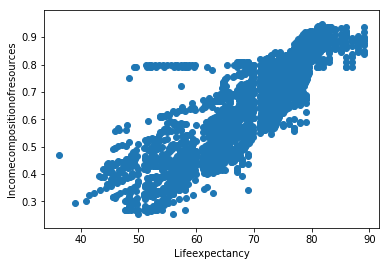

In [36]:
plt.scatter(useful_data['Lifeexpectancy'],useful_data['Incomecompositionofresources'])
plt.xlabel('Lifeexpectancy')
plt.ylabel('Incomecompositionofresources')
plt.show()  #Scatter plots to find how the relation is present 


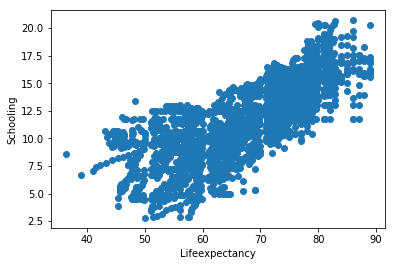

In [37]:
plt.scatter(useful_data['Lifeexpectancy'],useful_data['Schooling'])
plt.xlabel('Lifeexpectancy')
plt.ylabel('Schooling')
plt.show()


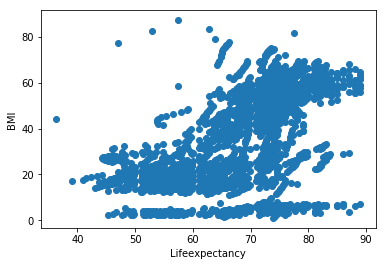

In [38]:
plt.scatter(useful_data['Lifeexpectancy'],useful_data['BMI'])
plt.xlabel('Lifeexpectancy')
plt.ylabel('BMI')
plt.show()

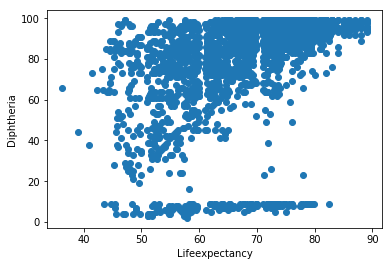

In [39]:
plt.scatter(useful_data['Lifeexpectancy'],useful_data['Diphtheria'])
plt.xlabel('Lifeexpectancy')
plt.ylabel('Diphtheria')
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2b5a9136518>,
 'caps': [<matplotlib.lines.Line2D at 0x2b5a9136dd8>,
 'boxes': [<matplotlib.lines.Line2D at 0x2b5a91363c8>],
 'medians': [<matplotlib.lines.Line2D at 0x2b5a913e668>],
 'fliers': [<matplotlib.lines.Line2D at 0x2b5a913ea90>],
 'means': []}

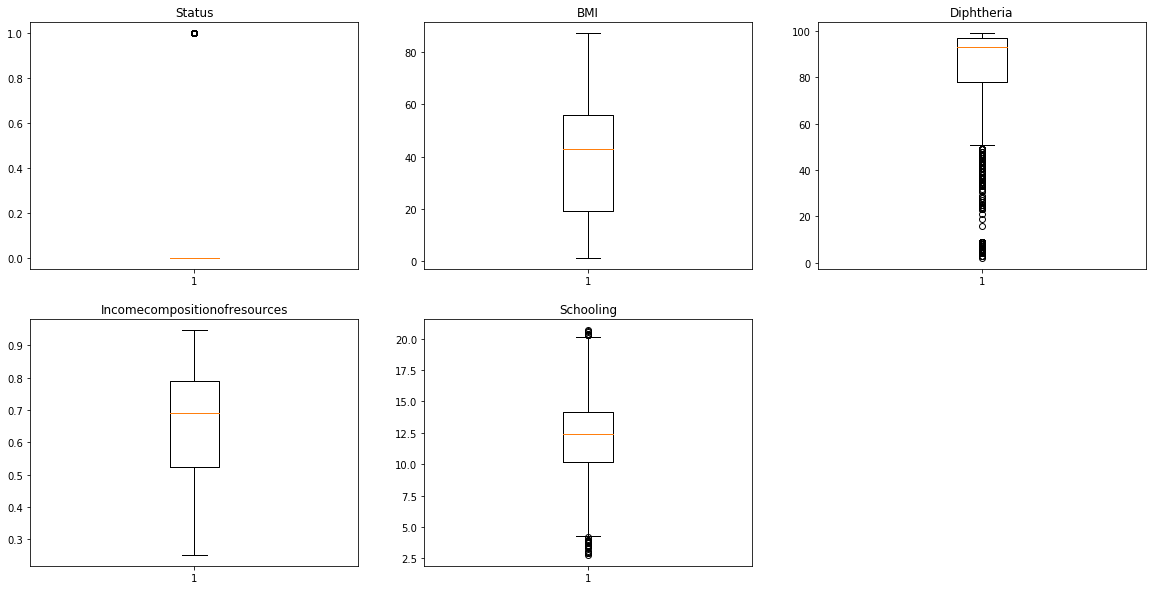

In [45]:
plt.figure(figsize=(20,10))
plt.subplot(231)
plt.title('Status')
plt.boxplot(useful_data['Status'])
plt.subplot(232)
plt.title('BMI')
plt.boxplot(useful_data['BMI'])
plt.subplot(233)
plt.title('Diphtheria')
plt.boxplot(useful_data['Diphtheria'])
plt.subplot(234)
plt.title('Incomecompositionofresources')
plt.boxplot(useful_data['Incomecompositionofresources'])
plt.subplot(235)
plt.title('Schooling')
plt.boxplot(useful_data['Schooling'])

In [43]:
use_data=useful_data[useful_data.Schooling>useful_data.Schooling.quantile(0.15)]
use_data=useful_data[useful_data.Schooling<useful_data.Schooling.quantile(0.85)] #Removing the outliers of Schooling

print(use_data.shape) #Printing the remaining no. of rows after removing outliers

(2483, 6)


Text(0.5,1,'Schooling')

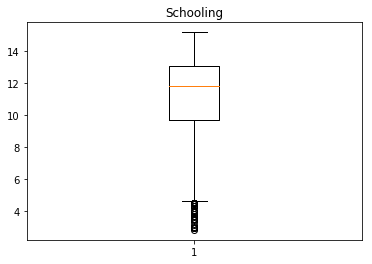

In [46]:
plt.boxplot(use_data['Schooling']) #Box plot to identify how well the outliers have been removed
plt.title('Schooling')

In [47]:
predictor=['Status','BMI','Diphtheria',
       'Incomecompositionofresources','Schooling'] #Taking the list of all the independent variables into a variable
target=["Lifeexpectancy"]
max1=use_data[target].max() #Finding max value of lifeexpectancy
min1=use_data[target].min() #Finding min value of lifeexpectancy

min_max_scaler = preprocessing.MinMaxScaler()
normalized = min_max_scaler.fit_transform(use_data) #Normalizing all the data (Between 0 to 1)
print(normalized)

use_data=pd.DataFrame(normalized,columns=['Status', 'Lifeexpectancy', 'BMI', 'Diphtheria',
       'Incomecompositionofresources', 'Schooling']) #Converting the normalized data back to dataframe from 2d array
print(use_data.head()) 
train,test=train_test_split(use_data,test_size=0.3,shuffle=False) #Splitting the data into train and test data 

[[0.         0.55512573 0.20973349 0.64948454 0.34346505 0.58870968]
 [0.         0.45647969 0.20393975 0.6185567  0.33890578 0.58064516]
 [0.         0.45647969 0.198146   0.63917526 0.32978723 0.57258065]
 ...
 [0.         0.16441006 0.29316338 0.71134021 0.26443769 0.58064516]
 [0.         0.17408124 0.28852839 0.75257732 0.26443769 0.56451613]
 [0.         0.18762089 0.2838934  0.78350515 0.27507599 0.56451613]]
   Status  Lifeexpectancy       BMI  Diphtheria  Incomecompositionofresources  \
0     0.0        0.555126  0.209733    0.649485                      0.343465   
1     0.0        0.456480  0.203940    0.618557                      0.338906   
2     0.0        0.456480  0.198146    0.639175                      0.329787   
3     0.0        0.448743  0.192352    0.670103                      0.319149   
4     0.0        0.442940  0.187717    0.680412                      0.305471   

   Schooling  
0   0.588710  
1   0.580645  
2   0.572581  
3   0.564516  
4   0.540323  


In [50]:
x_train=train[predictor] 
y_train=train[target] #Separating x_train and y_train
x_test=test[predictor]
y_test=test[target]  #Separating x_test and y_test
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_train.columns)
print(x_test.columns)

(1738, 5)
(1738, 1)
(745, 5)
(745, 1)
Index(['Status', 'BMI', 'Diphtheria', 'Incomecompositionofresources',
       'Schooling'],
      dtype='object')
Index(['Status', 'BMI', 'Diphtheria', 'Incomecompositionofresources',
       'Schooling'],
      dtype='object')


In [51]:
lm=LinearRegression() #Creating a Linear regression object
lm.fit(x_train,y_train) #Fitting the model
predict=lm.predict(x_test) #predicting the lifeexpectancy based on x_test values on the fitted curve
predict1=predict*(max1[0]-min1[0])+min1[0] #denormalizing the output
d_y_test=y_test*(max1[0]-min1[0])+min1[0]  #denormalizing the whole y_test values
print(predict1) 
mse=mean_squared_error(y_test,predict)
mse=mse*(max1[0]-min1[0])+min1[0] #denormalizing the error


[[77.28427466]
 [77.26867366]
 [77.14176051]
 [74.46462615]
 [76.77900052]
 [76.49071568]
 [75.90046818]
 [75.45197935]
 [75.12180876]
 [74.74399315]
 [74.35405571]
 [73.97017919]
 [73.83220887]
 [73.70636038]
 [73.5289666 ]
 [74.70051535]
 [76.72859834]
 [76.63842387]
 [76.4024787 ]
 [76.16653353]
 [75.6876372 ]
 [75.74392488]
 [75.43072157]
 [75.06502778]
 [74.70929515]
 [74.44468208]
 [74.07777283]
 [73.7898613 ]
 [73.71824288]
 [73.43639227]
 [73.0642165 ]
 [61.96533814]
 [60.99694026]
 [60.82386781]
 [61.14419716]
 [60.65628486]
 [60.23203968]
 [59.78344791]
 [59.23767568]
 [58.66159889]
 [58.1218397 ]
 [57.30711655]
 [56.3711201 ]
 [56.4308556 ]
 [55.3470786 ]
 [54.20584621]
 [49.80150698]
 [72.55162203]
 [73.82157159]
 [73.2072868 ]
 [73.71057734]
 [73.71678893]
 [73.69244223]
 [73.15514531]
 [72.71112861]
 [72.43993049]
 [72.34681749]
 [69.63958232]
 [71.43064018]
 [70.98851388]
 [66.10169451]
 [69.63829599]
 [71.15829075]
 [65.75396083]
 [73.20746986]
 [73.16846735]
 [72.92998

In [54]:
print("Mean squared error:",mse) 
print("Root mean squared error:",np.sqrt(mse))
print("The r2_score is:",r2_score(predict1,d_y_test))

Mean squared error: 36.923879607984986
Root mean squared error: 6.076502251129756
The r2_score is: 0.33784119831189663


In [59]:
#Now applying polynomial regression(higher degrees) to find the best fit
for i in range(2,8):
    print("----------Degree:",i,"----------")
    x_train_poly_data=x_train
    poly_reg=PolynomialFeatures(degree=i)
    poly=x_train_poly_data.iloc[:,:].values
    pol=poly_reg.fit_transform(poly)
    l=LinearRegression()
    l.fit(pol,y_train)
    poly_x_test=poly_reg.fit_transform(x_test)
    p=l.predict(poly_x_test)
    p1=p*(max1[0]-min1[0])+min1[0]
    print('The predicted life expectancy for the degree',i)
    print(p1[1:6])
    mse_poly=mean_squared_error(y_test,p)
    mse_pol=mse_poly*(max1[0]-min1[0])+min1[0]
    print("Mean squared error for degree",i,":",mse_pol)
    print("Root mean squared error for degree:",i,":",np.sqrt(mse_pol))
    print("r2 score:",r2_score(p1,d_y_test))
    print('\n')


----------Degree: 2 ----------
The predicted life expectancy for the degree 2
[[75.92000087]
 [75.51247029]
 [77.39289896]
 [76.42723415]
 [76.36765789]]
Mean squared error for degree 2 : 36.79511944921201
Root mean squared error for degree: 2 : 6.0658980744166815
r2 score: 0.5573654865692179


----------Degree: 3 ----------
The predicted life expectancy for the degree 3
[[75.81063376]
 [75.5886452 ]
 [77.1825898 ]
 [76.24145668]
 [75.80678413]]
Mean squared error for degree 3 : 36.80463692697962
Root mean squared error for degree: 3 : 6.066682530591132
r2 score: 0.5851745284522867


----------Degree: 4 ----------
The predicted life expectancy for the degree 4
[[75.52625726]
 [75.43009739]
 [75.31472061]
 [76.75560883]
 [76.39548538]]
Mean squared error for degree 4 : 36.89209680784247
Root mean squared error for degree: 4 : 6.073886466492642
r2 score: 0.4381921418470156


----------Degree: 5 ----------
The predicted life expectancy for the degree 5
[[ 75.02397813]
 [ 74.88764923]
 [24

->Therefore the best fit is the curve of degree 3 having :                                                              
    Mean squared error for degree 3 : 36.8 years                                                                        
    Root mean squared error for degree: 4 : 6.07 years                                                                   
    r2 score: 0.585                                                                                                        
    i.e 58.5% good fit
